m
[0.20378231]
merr
[0.00159484]


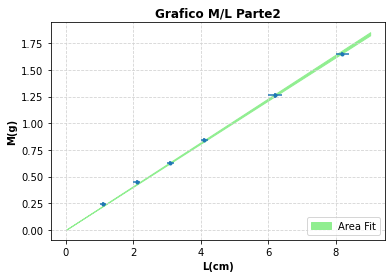

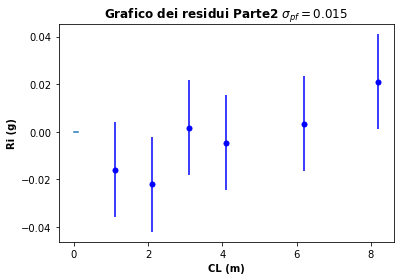

sigma_post_fit
0.015582669074592253


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

fig = plt.figure()
ax = fig.gca()

F = np.array([2.40E-01,4.50E-01,6.30E-01,8.40E-01,1.26E+00,1.65E+00])
F_err = np.ones(len(F))*0.02
CL = np.array([0.011,0.021,0.031,0.041,0.062,0.082])[:len(F)]*100
CL_err = np.array([0.001,0.001,0.001,0.001,0.002,0.002])[:len(F)]*100


plt.title("Grafico M/L Parte2",fontweight="bold")
plt.xlabel("L(cm)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(CL, F, xerr=CL_err, yerr=F_err, fmt='o', markersize=3)

def func(x, A):
  return (A*x)

popt, pcov = scipy.optimize.curve_fit(func, CL, F,sigma=F_err)

#fit,cov = np.polyfit(I,F, 1,w = 1/F_err,cov="True")
#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt
deltaYtot = (F_err**2+(m*CL_err)**2)**(1/2)
#fit,cov = np.polyfit(I,F, 1,w = 1/deltaYtot,cov="True")
popt, pcov = scipy.optimize.curve_fit(func, CL, F,sigma=deltaYtot)
#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt

print("m")
print(m)
print("merr")
print(merr)
#print("q")
#print(q)
#print("qerr")
#print(qerr)
q = qerr = 0


x = np.linspace(0,11/10*max(CL),1000)

y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1, label="Area Fit")
plt.legend(loc="lower right")
plt.show()
fig.savefig(f'GraficoMLParte2.pdf',dpi = 300)
Ff = q+m*CL

Ri = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Parte2 $\sigma_{pf} = 0.015$",fontweight="bold")
plt.xlabel("CL (m)",fontweight="bold")
plt.ylabel("Ri (g)",fontweight="bold")
plt.plot(np.linspace(0,0.1,1000),np.zeros(1000))
plt.errorbar(CL,Ri, yerr = F_err, markersize=5, color='blue',zorder=3, fmt='o')
plt.show()
fig.savefig(f'Residui_Parte2.pdf',dpi = 300)


sigma_post_fit = (np.sum((Ri)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)